In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from pyspark.ml.linalg import Vectors
from pandas import Series,DataFrame
import pandas as pd

In [2]:
X=[(1,1), (2,2), (3, 3), (10,10), (11,11), (12,12)]

label=[1,1,1,0,0,0]

print(X)
print(label)

[(1, 1), (2, 2), (3, 3), (10, 10), (11, 11), (12, 12)]
[1, 1, 1, 0, 0, 0]


In [3]:
x1 = [a_tuple[0] for a_tuple in X]
x2 = [a_tuple[0] for a_tuple in X]
print(x1)

[1, 2, 3, 10, 11, 12]


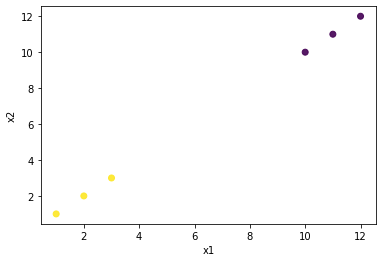

In [4]:
plt.scatter(x1,x2, c=label, alpha=0.9, label="Two Classes")
plt.xlabel("x1")
plt.ylabel("x2")

# plt.legend(loc='lower right')
plt.show()

In [5]:
# Now, let us fit a logistic regression model into this and test it on the train data. 
# this is using Scikit-learn to check our implementation
clf = LogisticRegression(fit_intercept=False, random_state=0).fit(X, label)
print(clf.predict(X))
clf.score(X, label)
print(clf.coef_)

print(clf.penalty)

[0 0 0 0 0 0]
[[-0.09347047 -0.09347047]]
l2


In [6]:
# Let us make a RDD in Spark 

# # Now, we create an RDD from this data. 
# # X is a numpy array 
# # y is a simple value lable
import numpy as np
import pandas as pd
from pyspark.ml.linalg import Vectors


data = {'y':label, 'x':X}

df = DataFrame(data)
df

spark_df_from_pandas = spark.createDataFrame(df, schema=['y', 'x'])
spark_df_from_pandas.show()


# # Now, we create an RDD from this data. 
# # X is a numpy array 
# # y is a simple value lable

trainRDD=spark_df_from_pandas.rdd.map(lambda x: (x[0], np.array(x[1]) ))
trainRDD.collect()


+---+--------+
|  y|       x|
+---+--------+
|  1|  [1, 1]|
|  1|  [2, 2]|
|  1|  [3, 3]|
|  0|[10, 10]|
|  0|[11, 11]|
|  0|[12, 12]|
+---+--------+



[(1, array([1, 1])),
 (1, array([2, 2])),
 (1, array([3, 3])),
 (0, array([10, 10])),
 (0, array([11, 11])),
 (0, array([12, 12]))]

In [7]:
# Calculates the cost and gradients 
# Without using the regulrization factor
def llh_cost_gradient(x, coeficients):
    """" LLH - loss function and gradiant """
    theta = np.dot(x[1], coeficients)
    
    cost = - x[0] * theta + np.log(1 + np.exp(theta))
    gradient = - x[1] * x[0] +  x[1] * (np.exp(theta) / (1 + np.exp(theta)))
    
    return cost, gradient

In [8]:
num_iteration = 100
learning_rate = 0.001
coef = np.ones(2) 
# number of data dimention, feature vector dimention


# We want to keep track of the costs so that we can visualize it later. 
cost_array = []
old_cost = 0
old_coef = coef

reg_lambda = 10

for i in range(num_iteration):
    
    rdd = trainRDD.map(lambda x: (llh_cost_gradient(x, coef)))
    result = rdd.reduce(lambda x,y: [x[0] + y[0], x[1] + y[1] ])
    
    gradient = result[1] + 2 * reg_lambda * coef

    cost = result[0] + np.sum(coef)
    
    print(str(i) + " Regression Coef (Weights): "+ str(coef) + "  Cost (negative LLH) :, " + str(cost))
    
    # update the weights 
    coef = coef - learning_rate * gradient

0 Regression Coef (Weights): [1. 1.]  Cost (negative LLH) :, 68.14755362647637
1 Regression Coef (Weights): [0.94716259 0.94716259]  Cost (negative LLH) :, 64.57295485350909
2 Regression Coef (Weights): [0.89540452 0.89540452]  Cost (negative LLH) :, 61.0738764023339
3 Regression Coef (Weights): [0.84470742 0.84470742]  Cost (negative LLH) :, 57.649326105723944
4 Regression Coef (Weights): [0.79505382 0.79505382]  Cost (negative LLH) :, 54.298406537429074
5 Regression Coef (Weights): [0.74642716 0.74642716]  Cost (negative LLH) :, 51.020323747974615
6 Regression Coef (Weights): [0.69881194 0.69881194]  Cost (negative LLH) :, 47.81439651173713
7 Regression Coef (Weights): [0.6521937 0.6521937]  Cost (negative LLH) :, 44.680065778962614
8 Regression Coef (Weights): [0.60655919 0.60655919]  Cost (negative LLH) :, 41.616903976681115
9 Regression Coef (Weights): [0.56189641 0.56189641]  Cost (negative LLH) :, 38.62462392019716
10 Regression Coef (Weights): [0.51819471 0.51819471]  Cost (neg

85 Regression Coef (Weights): [-0.07726385 -0.07726385]  Cost (negative LLH) :, 2.936566573813377
86 Regression Coef (Weights): [-0.07726659 -0.07726659]  Cost (negative LLH) :, 2.936552610808688
87 Regression Coef (Weights): [-0.077269 -0.077269]  Cost (negative LLH) :, 2.936540338696429
88 Regression Coef (Weights): [-0.07727112 -0.07727112]  Cost (negative LLH) :, 2.936529552533789
89 Regression Coef (Weights): [-0.07727298 -0.07727298]  Cost (negative LLH) :, 2.9365200722585247
90 Regression Coef (Weights): [-0.07727461 -0.07727461]  Cost (negative LLH) :, 2.9365117396591542
91 Regression Coef (Weights): [-0.07727605 -0.07727605]  Cost (negative LLH) :, 2.9365044157162026
92 Regression Coef (Weights): [-0.07727732 -0.07727732]  Cost (negative LLH) :, 2.9364979782685743
93 Regression Coef (Weights): [-0.07727843 -0.07727843]  Cost (negative LLH) :, 2.936492319964934
94 Regression Coef (Weights): [-0.0772794 -0.0772794]  Cost (negative LLH) :, 2.9364873464650088
95 Regression Coef (W

In [9]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

In [10]:
sigmoid(0.0001)

0.5000249999999792

In [11]:
sigmoid(-0.0001)

0.4999750000000208

In [12]:
 def prediction(x, coef, threshold):
        """calculate the theta and label with 1 if theta > 0  """
        theta = np.dot(x[1], coef)
        
        # Instead of calculating the sigmoid you simply calculate the theta and save computations. 
        probabilities = sigmoid(theta)
        
        prediction = 1 if probabilities >= threshold else 0
        
        return (x[0] , prediction, probabilities, theta,  x[1])

In [13]:
# More info about threshold moving here 
# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

rdd_results = trainRDD.map(lambda x: prediction(x, coef, 0.3))
rdd_results.collect()

[(1, 1, 0.4614351354261673, -0.1545664510765309, array([1, 1])),
 (1, 1, 0.4233264017142462, -0.3091329021530618, array([2, 2])),
 (1, 1, 0.3861086021960976, -0.46369935322959266, array([3, 3])),
 (0, 0, 0.1757133298340575, -1.5456645107653089, array([10, 10])),
 (0, 0, 0.15443510254692605, -1.7002309618418399, array([11, 11])),
 (0, 0, 0.13531060910954884, -1.8547974129183706, array([12, 12]))]